<a href="https://colab.research.google.com/github/shubh2016shiv/Machine-Learning-Project-in-Finance-Domain/blob/main/Lending_Club_Dataset_ML_Assignment_PART_2_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installation of some important python libraries

In [ ]:
!pip install --upgrade --q --no-cache-dir gdown
!gdown 1KSyN27_9wC69tdUdPNRzvzxwI_32PnKb

Downloading...
From: https://drive.google.com/uc?id=1KSyN27_9wC69tdUdPNRzvzxwI_32PnKb
To: /content/requirements.txt
100% 333/333 [00:00<00:00, 339kB/s]


In [ ]:
!pip install --q -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.6/288.6 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.5/381.5 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.3/76.3 MB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.2/180.2 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install --q optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.5/348.5 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.4/210.4 KB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.1/147.1 KB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 KB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 KB 8.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.4.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
pycaret 2.3.5 requires scipy<=1.5.4, but you have scipy 1.8.1 which is incompatible.
mlflow 1.22.0 requires alembic<=1.4.1, bu

**RESTART THE RUNTIME AFTER EXECUTING ABOVE CELLS**

---



## Downloading Lending Club Dataset in Colab

In [ ]:
!gdown 1PA2OMmdnptQ-mv81rCcKSirOJsBegH-8

Downloading...
From: https://drive.google.com/uc?id=1PA2OMmdnptQ-mv81rCcKSirOJsBegH-8
To: /content/Loan_status_2007-2020Q3.gzip
100% 1.77G/1.77G [00:20<00:00, 84.5MB/s]


## Credit Conversion Factor Prediction (Regression Problem) 

### Data Preparation

**OBJECTIVE:**


>The objective of this section is to prepare the raw lending club loan data by selecting the relevant loan and borrower's financial attributes after loan is declared charged-off

#### Imports

In [ ]:
import pandas as pd # Pandas library for maniputlating dataframe
import numpy as np # Numpy library for manipulating array or matrix
from sklearn.model_selection import train_test_split # Sklearn library for splitting dataset
from sklearn.preprocessing import StandardScaler
from feature_engine.imputation import RandomSampleImputer # Feature Engine library to replacing the missing values in dataset in numerical columns
from feature_engine.imputation import CategoricalImputer # Feature Engine library to replacing the missing values in dataset in categorical columns 
from feature_engine.encoding import OneHotEncoder as fe_OneHotEncoder # Feature Engine library to perform one-hot encoding

from matplotlib import pyplot as plt
import seaborn as sns

sns.set()

In [ ]:
import warnings # import warning to supress any warning in output logs 
warnings.filterwarnings(action='ignore')

#### Read the original Dataset in Pandas Dataframe

In [ ]:
# Read the original dataset
loan_data_original_df = pd.read_csv("/content/Loan_status_2007-2020Q3.gzip",low_memory=True,nrows=1000000)

In [ ]:
# Filter the rows where loans are charged off
loan_data_defaults = loan_data_original_df[loan_data_original_df['loan_status'].isin(['Charged Off','Does not meet the credit policy. Status:Charged Off'])]

In [ ]:
# Selecting the relevant columns for the regression problem
loan_data_defaults = loan_data_defaults[
['grade', # loan grade
'total_rec_prncp', # Principal received to date
'home_ownership', # home_ownership status of the borrower
'verification_status', # Indicates if income was verified by LC
'purpose', # Purpose of the loan request
'initial_list_status', # The initial listing status of the loan
'term', # The number of payments on the loan
'emp_length', # Employment length in years.
'issue_d', # The month which the loan was funded
'earliest_cr_line', # The month the borrower's earliest reported credit line was opened
'funded_amnt', # The total amount committed to that loan at that point in time.
'int_rate', # Interest Rate on the loan
'installment', # The monthly payment owed by the borrower if the loan originates.
'annual_inc', # The self-reported annual income
'dti', # debt to income ratio
'delinq_2yrs', # The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
'mths_since_last_delinq', # The number of months since the borrower's last delinquency
'mths_since_last_record', # The number of months since the last public record
'open_acc', # The number of open credit lines
'pub_rec', # Number of derogatory public records
'total_acc', # The total number of credit lines currently
'acc_now_delinq', # The number of accounts on which the borrower is now delinquent
'total_rev_hi_lim', # Total revolving high credit/credit limit
'revol_bal', # Total credit revolving balance
'out_prncp', # 	Remaining outstanding principal for total amount funded
'recoveries', # post charge off gross recovery
]
]

### Data Pre-Processing for regression

**OBJECTIVE:**


>The objective of this section is to pre-process the data by converting the data types, filling missing values, encoding categorical columns and scaling 


In [ ]:
RANDOM_SEED = 42 # Setting the global random seed so that results are everywhere where randomness is involved 

#### Defining the Target Variable

In [ ]:
# Calculate the CCF (Credit Conversion Factor) using principal amount recovered, funded amount and store the result in CCF columns of the dataframe
loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp']) / loan_data_defaults['funded_amnt']

In [ ]:
# Some Statistics related to Credit Conversion Factor
loan_data_defaults['CCF'].describe()

count    118978.000000
mean          0.731695
std           0.202411
min           0.000000
25%           0.624429
50%           0.783131
75%           0.886442
max           1.000000
Name: CCF, dtype: float64

<AxesSubplot:xlabel='CCF', ylabel='Count'>

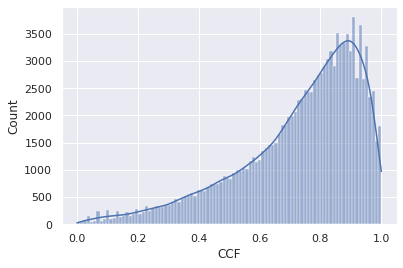

In [ ]:
# Check the distribution of CCF (Credit Conversion Factor)
sns.histplot(data=loan_data_defaults,x='CCF',kde=True)

#### Splitting Dataset into almost 70% Training, 10% validation and 20% Testing dataset

In [ ]:
X = loan_data_defaults.drop(['CCF'],axis=1)
y = loan_data_defaults['CCF']

In [ ]:
# split data into 70% training, 10% validation and 20% testing data
X_train_original, X_test, y_train_original, y_test = train_test_split(X, y, test_size=0.20, random_state=RANDOM_SEED)
X_train, X_val, y_train, y_val = train_test_split(X_train_original, y_train_original, test_size=0.125, random_state=RANDOM_SEED)

In [ ]:
# Check the size of training dataset
X_train_original.shape

(95182, 26)

In [ ]:
# Check the size of test dataset 
X_test.shape

(23796, 26)

In [ ]:
# Check the size of validation dataset
X_val.shape

(11898, 26)

In [ ]:
print("Proportion of Training dataset: {:.2f} percent".format((X_train_original.shape[0]/(X_train_original.shape[0] + X_test.shape[0] + X_val.shape[0]))*100))
print("Proportion of Validation dataset: {:.2f} percent".format((X_val.shape[0]/(X_train_original.shape[0] + X_test.shape[0] + X_val.shape[0]))*100))
print("Proportion of Testing dataset: {:.2f} percent".format((X_test.shape[0]/(X_train_original.shape[0] + X_test.shape[0] + X_val.shape[0]))*100))

Proportion of Training dataset: 72.73 percent
Proportion of Validation dataset: 9.09 percent
Proportion of Testing dataset: 18.18 percent


#### Convert data type into numerical for certain columns

In [ ]:
# create a helper function clean up the emp_length column, assign 0 to NANs, and convert to numeric
def emp_length_converter(df, column):
    df[column] = df[column].str.replace('\+ years', '')
    df[column] = df[column].str.replace('< 1 year', str(0))
    df[column] = df[column].str.replace(' years', '')
    df[column] = df[column].str.replace(' year', '')
    df[column] = pd.to_numeric(df[column])
    df[column].fillna(value = 0, inplace = True)


# function to remove 'months' string from the 'term' column and convert it to numeric
def loan_term_converter(df, column):
    df[column] = pd.to_numeric(df[column].str.replace(' months', ''))

# convert date columns to datetime format and create a new column as a difference between 1 January 2022 and the respective date
def date_column_converter(df, column):
    # store current month
    today_date = pd.to_datetime('01-01-2022',format = "%b-%y",infer_datetime_format=True)
    # convert to datetime format
    df[column] = pd.to_datetime(df[column], format = "%b-%y", infer_datetime_format=True)
    # calculate the difference in months and add to a new column
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
    # make any resulting -ve values to be equal to the max date
    df['mths_since_' + column] = df['mths_since_' + column].apply(lambda x: df['mths_since_' + column].max() if x < 0 else x)
    # drop the original date column
    df.drop(columns = [column], inplace = True)



def int_rate_converter(df, column):
    df[column] = pd.to_numeric(df[column].str.replace('%', ''))

def object_to_numeric_converter(df,columns):
  for column in columns:
    df[column] = pd.to_numeric(df[column])

In [ ]:
# apply data conversions to training dataset
emp_length_converter(X_train_original, 'emp_length')
loan_term_converter(X_train_original, 'term')
int_rate_converter(X_train_original, 'int_rate')
date_column_converter(X_train_original, 'issue_d')
date_column_converter(X_train_original, 'earliest_cr_line')

In [ ]:
# Apply the data conversions to other object type columns, which does not requires string replacements
object_to_numeric_converter(X_train_original,['dti',
                                              'delinq_2yrs',
                                              'mths_since_last_delinq',
                                              'mths_since_last_record',
                                              'open_acc',
                                              'pub_rec',
                                              'total_acc',
                                              'acc_now_delinq',
                                              'total_rev_hi_lim',
                                              'mths_since_earliest_cr_line'])

In [ ]:
# Remove duplicate rows if there are any
X_train_original = X_train_original.drop_duplicates()

#### Missing value imputation

In [ ]:
# Imputing Missing Values using Random Imputation 
random_sample_imputer = RandomSampleImputer(random_state = RANDOM_SEED)
categorical_imputer = CategoricalImputer()

In [ ]:
# Find the numerical and categorical columns
numerical_columns = list(X_train_original.select_dtypes(include=['int','float']).columns)
categorical_columns = list(X_train_original.select_dtypes(include=['object']).columns)

In [ ]:
# Find the numerical and categorical columns which has missing values
null_numerical_columns = [col for col,null in dict(X_train_original[numerical_columns].isnull().sum()).items() if null>0]
null_categorical_columns = [col for col,null in dict(X_train_original[categorical_columns].isnull().sum()).items() if null>0]

In [ ]:
# Names of the numerical columns where missing values are present
null_numerical_columns

['dti',
 'delinq_2yrs',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'total_acc',
 'acc_now_delinq',
 'total_rev_hi_lim',
 'mths_since_earliest_cr_line']

In [ ]:

# Names of the categorical columns where missing values are present
null_categorical_columns

[]

In [ ]:
# Finally, impute the missing values in numerical columns
random_sample_imputer = RandomSampleImputer(random_state = RANDOM_SEED)
X_train_original[null_numerical_columns] = random_sample_imputer.fit_transform(X_train_original[null_numerical_columns])

#### Encoding categorical columns using one-hot encoding

In [ ]:
# Encoding the categorical columns using one-hot encoding
ohe_enc = fe_OneHotEncoder(
    top_categories=None,
    variables=list(categorical_columns),  # select which variables to encode
    drop_last=False)  


ohe_enc.fit(X_train_original)

OneHotEncoder(variables=['grade', 'home_ownership', 'verification_status',
                         'purpose', 'initial_list_status'])

In [ ]:
# Apply one-hot encoding transformation to training dataset
X_train_original = ohe_enc.transform(X_train_original)

#### Scaling numerical columns

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_original[numerical_columns] = scaler.fit_transform(X_train_original[numerical_columns])

#### Final Check with Training Data

In [ ]:
X_train_original.head()

,total_rec_prncp,term,emp_length,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,...,purpose_medical,purpose_major_purchase,purpose_wedding,purpose_vacation,purpose_house,purpose_car,purpose_educational,purpose_renewable_energy,initial_list_status_w,initial_list_status_f
113539,-0.333092,-0.786496,1.261438,-0.573261,0.315375,-0.360977,0.036747,-0.916607,-0.332692,0.969509,...,0,0,0,0,0,0,0,0,1,0
218306,0.602348,1.271462,1.261438,0.820601,-0.016694,0.347537,0.214183,-0.461222,-0.332692,1.476510,...,0,0,0,0,0,0,0,0,0,1
326173,-0.699958,1.271462,1.261438,-0.513338,0.410252,-0.705571,-0.015929,-0.415515,-0.332692,-0.182764,...,0,0,0,0,0,0,0,0,1,0
383280,0.164241,-0.786496,1.261438,-0.680080,0.778373,-0.449789,0.277949,-0.197697,-0.332692,-0.136673,...,0,0,0,0,0,0,0,0,0,1
770949,-0.925054,-0.786496,-0.533844,-0.096482,-1.103981,0.027171,-0.004840,-0.944257,0.888248,-0.735855,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
X_train_original.shape

(95182, 53)

In [ ]:
X_train_original.isnull().sum()

total_rec_prncp                        0
term                                   0
emp_length                             0
funded_amnt                            0
int_rate                               0
installment                            0
annual_inc                             0
dti                                    0
delinq_2yrs                            0
mths_since_last_delinq                 0
mths_since_last_record                 0
open_acc                               0
pub_rec                                0
total_acc                              0
acc_now_delinq                         0
total_rev_hi_lim                       0
revol_bal                              0
out_prncp                              0
recoveries                             0
mths_since_issue_d                     0
mths_since_earliest_cr_line            0
grade_D                                0
grade_C                                0
grade_B                                0
grade_A         

### Regression Experiments (USING SMALL PORTION OF TRAINING DATASET)

**OBJECTIVE:**


>The objective is to perform regression experiments using all base ML models. It is important so that three good performing trained models could be selected first using small portion of training dataset and those selected models could be trained and optimized for MSE score using whole training and validation dataset

>Finally, the machine learning model, which has lowest MSE score with other considerations, would be selected as final model to evaluate and predict the unseen values using test dataset.

> Optinally, experiment tracking using MLFlow for all base regression models is also done 


#### Imports

In [ ]:
from pycaret.regression import *
import mlflow
import os
from getpass import getpass

#### [OPTIONAL] Set mlflow for tracking the regression experiments

In [ ]:
os.environ['MLFLOW_TRACKING_USERNAME'] = input()
os.environ['MLFLOW_TRACKING_PASSWORD'] = getpass('')
os.environ['MLFLOW_TRACKING_PROJECTNAME'] = input('')

mlflow.set_tracking_uri(f'https://dagshub.com/' + os.environ['MLFLOW_TRACKING_USERNAME'] 
                        + '/' + os.environ['MLFLOW_TRACKING_PROJECTNAME'] + '.mlflow')

with mlflow.start_run(run_name="MLflow on Colab"):
  mlflow.log_metric("m1", 2.0)
  mlflow.log_param("p1", "mlflow-colab")

shubh2016shiv
··········
ccf_regression_exps


#### Setting up the regression experiment on small portion on training Dataset

In [ ]:
# Experiments are done with samples of size 40000 for faster results and execution
data = pd.concat([X_train_original,y_train_original],axis=1).sample(n=40000,random_state=RANDOM_SEED)

In [ ]:
# Prepare the data and setup the experiment using pycaret library
regression_experiments = setup(data = data, 
                                train_size = 0.8,
                                target = 'CCF',
                                #log_experiment=True,
                                #experiment_name='ccf_regression_exps_30_dec_2022',
                                #log_plots=True,
                                session_id=RANDOM_SEED
                                )

,Description,Value
0,session_id,42
1,Target,CCF
2,Original Data,"(40000, 54)"
3,Missing Values,False
4,Numeric Features,19
5,Categorical Features,34
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(32000, 51)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='CCF',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='me...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

#### Compare all base regression ML models

In [ ]:
# Run the regression experiment for comparing all regression model performance on the given data
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.0021,0.000000e+00,6.000000e-03,9.991000e-01,0.0049,0.0554,36.014
et,Extra Trees Regressor,0.0026,1.000000e-04,7.700000e-03,9.985000e-01,0.0064,0.0968,24.876
catboost,CatBoost Regressor,0.0039,1.000000e-04,8.000000e-03,9.984000e-01,0.0062,0.0911,13.364
lightgbm,Light Gradient Boosting Machine,0.0050,1.000000e-04,9.500000e-03,9.978000e-01,0.0073,0.1119,0.738
dt,Decision Tree Regressor,0.0046,1.000000e-04,1.150000e-02,9.967000e-01,0.0089,0.0539,0.594
gbr,Gradient Boosting Regressor,0.0117,4.000000e-04,1.880000e-02,9.914000e-01,0.0141,0.1582,9.513
ada,AdaBoost Regressor,0.0893,1.010000e-02,1.003000e-01,7.542000e-01,0.0597,0.4263,6.261
br,Bayesian Ridge,0.0699,1.010000e-02,1.005000e-01,7.532000e-01,0.0650,0.6080,0.157
ridge,Ridge Regression,0.0699,1.010000e-02,1.005000e-01,7.531000e-01,0.0650,0.6083,0.039
lr,Linear Regression,0.0699,1.010000e-02,1.005000e-01,7.531000e-01,0.0650,0.6083,0.551


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 2
INFO:logs:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
# See Regression experiments table
import IPython
display(IPython.display.IFrame("https://dagshub.com/"+ os.environ['MLFLOW_TRACKING_USERNAME'] 
                        + '/' + os.environ['MLFLOW_TRACKING_PROJECTNAME'] + "/experiments/#/",'100%',600))

### Training and optimizing selected regression models (ON WHOLE TRAINING DATASET)

**OBJECTIVE:**


>The objective of this section is to train and optimize the 3 selected regression models and evaluate the performance using cross validation

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.model_selection import FeatureImportances

#### Function for K-Cross Validation

In [ ]:
'''
This function performs the 3-fold Cross validation and will be used repeatedly for three selected models  
'''

def get_k_fold_cross_validation_scores(X,y,estimator,scoring_metric,model_name=None,n_splits=5,dataset_type=None,optimization_type_used=None):
  if dataset_type is not None:
    cv_scores = cross_val_score(estimator=estimator,\
                X = X,\
                y = y,\
                scoring=scoring_metric, # Scoring Meric such as r2, MSE, RMSE etc
                cv=3, # Cross validation using 3-folds
                n_jobs=-1)  
    return (
        "Cross Validation {} of {} Optimized {} model on {}: {:.3f} +/- {:.3f}".format(scoring_metric,optimization_type_used,model_name,dataset_type,np.mean(cv_scores),np.std(cv_scores)),
        np.mean(cv_scores), # Average Score
        np.std(cv_scores) # Score standard deviation
    )

#### Preparing validation dataset

In [ ]:
# apply data conversions to validation dataset
emp_length_converter(X_val, 'emp_length')
loan_term_converter(X_val, 'term')
int_rate_converter(X_val, 'int_rate')
date_column_converter(X_val, 'issue_d')
date_column_converter(X_val, 'earliest_cr_line')

In [ ]:
# Apply the data conversions to other object type columns, which does not requires string replacements

#Validation Dataset
object_to_numeric_converter(X_val,['dti',
                                    'delinq_2yrs',
                                    'mths_since_last_delinq',
                                    'mths_since_last_record',
                                    'open_acc',
                                    'pub_rec',
                                    'total_acc',
                                    'acc_now_delinq',
                                    'total_rev_hi_lim',
                                    'mths_since_earliest_cr_line'])

In [ ]:
# Imputing missing values

# on validation dataset
X_val[null_numerical_columns] = random_sample_imputer.transform(X_val[null_numerical_columns])

In [ ]:
# Apply one-hot encoding transformation

#validation dataset
X_val = ohe_enc.transform(X_val)

In [ ]:
# perform scaling transformation

# validation dataset
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])

#### Training and optimizing Linear Regression Model with cross validation

In [ ]:
# Create the model
linear_regression_model = LinearRegression(copy_X=True)

In [ ]:
# Define the parameter grid
param_grid = {
     'fit_intercept': [True, False],
     'normalize': [True, False]
}

# Create the grid search object
linear_regression_gridSearch_optimizer = GridSearchCV(estimator=linear_regression_model, # Hyper-parameter tuning using linear regression
                                                      param_grid=param_grid, # Parameter seach space
                                                      cv=3, # Cross validation evaluation using 3-folds
                                                      scoring='neg_mean_squared_error', # Find combination with maximum negative mean square error 
                                                      verbose=4,
                                                      n_jobs=-1 # Use all the available CPU cores for hyper-parameter tuning 
                                                      )

# Fit the grid search to the training data
linear_regression_gridSearch_optimizer.fit(X_train_original, y_train_original)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    6.0s finished


GridSearchCV(cv=3, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring='neg_mean_squared_error', verbose=4)

In [ ]:
# Print the best hyperparameters
print(linear_regression_gridSearch_optimizer.best_params_)

{'fit_intercept': True, 'normalize': False}


In [ ]:
optimized_linear_regression_model = linear_regression_gridSearch_optimizer.best_estimator_

In [ ]:
# Perform the cross validation for r2 score on training and validation using optimized Linear Regression Model
# Using training dataset
cv_result, mean_cv, std_cv = get_k_fold_cross_validation_scores(X = X_train_original,
                                                                 y = y_train_original,
                                                                 estimator = optimized_linear_regression_model,
                                                                 scoring_metric='r2',
                                                                 model_name="Linear Regression",
                                                                 dataset_type='training dataset',
                                                                 optimization_type_used="Random Search")

print(cv_result)

# Using Validation dataset
cv_result, mean_cv, std_cv = get_k_fold_cross_validation_scores(X = X_val,
                                                                 y = y_val,
                                                                 estimator = optimized_linear_regression_model,
                                                                 scoring_metric='r2',
                                                                 model_name="Linear Regression",
                                                                 dataset_type='validation dataset',
                                                                 optimization_type_used="Random Search")

print(cv_result)

Cross Validation r2 of Random Search Optimized Linear Regression model on training dataset: 0.746 +/- 0.008
Cross Validation r2 of Random Search Optimized Linear Regression model on validation dataset: 0.746 +/- 0.006


In [ ]:
# Perform the cross validation for MSE score on training and validation using optimized Linear Regression Model
# Using training dataset
cv_result, mean_cv, std_cv = get_k_fold_cross_validation_scores(X = X_train_original,
                                                                 y = y_train_original,
                                                                 estimator = optimized_linear_regression_model,
                                                                 scoring_metric='neg_mean_squared_error',
                                                                 model_name="Linear Regression",
                                                                 dataset_type='training dataset',
                                                                 optimization_type_used="Random Search")

print(cv_result)

# Using Validation dataset
cv_result, mean_cv, std_cv = get_k_fold_cross_validation_scores(X = X_val,
                                                                 y = y_val,
                                                                 estimator = optimized_linear_regression_model,
                                                                 scoring_metric='neg_mean_squared_error',
                                                                 model_name="Linear Regression",
                                                                 dataset_type='validation dataset',
                                                                 optimization_type_used="Random Search")

print(cv_result)

Cross Validation neg_mean_squared_error of Random Search Optimized Linear Regression model on training dataset: -0.010 +/- 0.000
Cross Validation neg_mean_squared_error of Random Search Optimized Linear Regression model on validation dataset: -0.010 +/- 0.000


#### Training and optimizing Adaboost Regression Model with cross validation

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100,150],
    'learning_rate': [0.01,0.1, 0.5, 1],
    'loss':['linear','square']
}

# Create the adaboost regression model
adaboost_regression_model = AdaBoostRegressor(random_state=RANDOM_SEED)

# Create the grid search object
adaboost_randomSearch_optimizer = RandomizedSearchCV(estimator=adaboost_regression_model, # Hyper-parameter tuning using Adaboost regression
                                            param_distributions=param_grid, # Parameter seach space
                                            cv=3,   # Cross validation evaluation using 5-folds
                                            scoring='neg_mean_squared_error',   # Find combination with maximum negative mean square error 
                                            random_state=RANDOM_SEED, # Same random seed for consistent result
                                            verbose=4)

# Fit the grid search to the training data
adaboost_randomSearch_optimizer.fit(X_train_original, y_train_original)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=50, loss=square, learning_rate=1 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=50, loss=square, learning_rate=1, score=-0.011, total=  23.8s
[CV] n_estimators=50, loss=square, learning_rate=1 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.8s remaining:    0.0s


[CV]  n_estimators=50, loss=square, learning_rate=1, score=-0.011, total=  21.2s
[CV] n_estimators=50, loss=square, learning_rate=1 ...................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   45.0s remaining:    0.0s


[CV]  n_estimators=50, loss=square, learning_rate=1, score=-0.012, total=  22.7s
[CV] n_estimators=150, loss=square, learning_rate=0.1 ................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min remaining:    0.0s


[CV]  n_estimators=150, loss=square, learning_rate=0.1, score=-0.007, total= 1.3min
[CV] n_estimators=150, loss=square, learning_rate=0.1 ................
[CV]  n_estimators=150, loss=square, learning_rate=0.1, score=-0.008, total= 1.1min
[CV] n_estimators=150, loss=square, learning_rate=0.1 ................
[CV]  n_estimators=150, loss=square, learning_rate=0.1, score=-0.008, total= 1.2min
[CV] n_estimators=10, loss=linear, learning_rate=1 ...................
[CV]  n_estimators=10, loss=linear, learning_rate=1, score=-0.008, total=   4.7s
[CV] n_estimators=10, loss=linear, learning_rate=1 ...................
[CV]  n_estimators=10, loss=linear, learning_rate=1, score=-0.007, total=   4.6s
[CV] n_estimators=10, loss=linear, learning_rate=1 ...................
[CV]  n_estimators=10, loss=linear, learning_rate=1, score=-0.008, total=   4.6s
[CV] n_estimators=50, loss=linear, learning_rate=0.5 .................
[CV]  n_estimators=50, loss=linear, learning_rate=0.5, score=-0.008, total=  22

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 11.0min finished


RandomizedSearchCV(cv=3, estimator=AdaBoostRegressor(random_state=42),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5, 1],
                                        'loss': ['linear', 'square'],
                                        'n_estimators': [10, 50, 100, 150]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=4)

In [ ]:
# Print the best hyperparameters
print(adaboost_randomSearch_optimizer.best_params_)

{'n_estimators': 50, 'loss': 'linear', 'learning_rate': 0.1}


In [ ]:
# Optimized Adaboost Regression model
optimized_adaboost_regression_model = adaboost_randomSearch_optimizer.best_estimator_

In [ ]:
# Perform the cross validation for r2 score on training and validation using optimized Adaboost Regression Model
# Using training dataset
cv_result, mean_cv, std_cv = get_k_fold_cross_validation_scores(X = X_train_original,
                                                                 y = y_train_original,
                                                                 estimator = optimized_adaboost_regression_model,
                                                                 scoring_metric='r2',
                                                                 model_name="Adaboost Regression",
                                                                 dataset_type='training dataset',
                                                                 optimization_type_used="Random Search")

print(cv_result)

# Using Validation dataset
cv_result, mean_cv, std_cv = get_k_fold_cross_validation_scores(X = X_val,
                                                                 y = y_val,
                                                                 estimator = optimized_adaboost_regression_model,
                                                                 scoring_metric='r2',
                                                                 model_name="Adaboost Regression",
                                                                 dataset_type='validation dataset',
                                                                 optimization_type_used="Random Search")

print(cv_result)

Cross Validation r2 of Random Search Optimized Adaboost Regression model on training dataset: 0.817 +/- 0.004
Cross Validation r2 of Random Search Optimized Adaboost Regression model on validation dataset: 0.829 +/- 0.007


In [ ]:
# Perform the cross validation for MSE score on training and validation using optimized Adaboost Regression Model
# Using training dataset
cv_result, mean_cv, std_cv = get_k_fold_cross_validation_scores(X = X_train_original,
                                                                 y = y_train_original,
                                                                 estimator = optimized_adaboost_regression_model,
                                                                 scoring_metric='neg_mean_squared_error',
                                                                 model_name="Adaboost Regression",
                                                                 dataset_type='training dataset',
                                                                 optimization_type_used="Random Search")

print(cv_result)

# Using Validation dataset
cv_result, mean_cv, std_cv = get_k_fold_cross_validation_scores(X = X_val,
                                                                 y = y_val,
                                                                 estimator = optimized_adaboost_regression_model,
                                                                 scoring_metric='neg_mean_squared_error',
                                                                 model_name="Adaboost Regression",
                                                                 dataset_type='validation dataset',
                                                                 optimization_type_used="Random Search")

print(cv_result)

Cross Validation neg_mean_squared_error of Random Search Optimized Adaboost Regression model on training dataset: -0.007 +/- 0.000
Cross Validation neg_mean_squared_error of Random Search Optimized Adaboost Regression model on validation dataset: -0.007 +/- 0.000


#### Training and optimizing Decision Tree Regression Model with cross validation

In [ ]:
# Create a decision tree regressor
decision_tree_regression_model = DecisionTreeRegressor(random_state=RANDOM_SEED)

# Define the parameter grid
param_grid = {'max_depth': [10, 20, 30, 40, 50],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_leaf_nodes': [10,20, 30, 40, 50]}

# Create the random search object
decision_tree_randomSearch_optimizer = RandomizedSearchCV(estimator=decision_tree_regression_model, # Hyper-parameter tuning using Decision Tree regression
                                                  param_distributions=param_grid, # Parameter seach space
                                                  cv=3, # Cross validation evaluation using 5-folds
                                                  scoring='neg_mean_squared_error', # Find combination with maximum negative mean square error
                                                  verbose=4,
                                                  random_state=RANDOM_SEED # Same random seed for consistent result
                                                  )

# Fit the random search to the training data
decision_tree_randomSearch_optimizer.fit(X_train_original, y_train_original)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=50, max_features=log2, max_depth=30 
[CV]  min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=50, max_features=log2, max_depth=30, score=-0.020, total=   0.1s
[CV] min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=50, max_features=log2, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=50, max_features=log2, max_depth=30, score=-0.019, total=   0.1s
[CV] min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=50, max_features=log2, max_depth=30 
[CV]  min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=50, max_features=log2, max_depth=30, score=-0.018, total=   0.1s
[CV] min_samples_split=10, min_samples_leaf=2, max_leaf_nodes=40, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


[CV]  min_samples_split=10, min_samples_leaf=2, max_leaf_nodes=40, max_features=auto, max_depth=30, score=-0.003, total=   0.7s
[CV] min_samples_split=10, min_samples_leaf=2, max_leaf_nodes=40, max_features=auto, max_depth=30 
[CV]  min_samples_split=10, min_samples_leaf=2, max_leaf_nodes=40, max_features=auto, max_depth=30, score=-0.003, total=   0.7s
[CV] min_samples_split=10, min_samples_leaf=2, max_leaf_nodes=40, max_features=auto, max_depth=30 
[CV]  min_samples_split=10, min_samples_leaf=2, max_leaf_nodes=40, max_features=auto, max_depth=30, score=-0.003, total=   0.7s
[CV] min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=50, max_features=log2, max_depth=50 
[CV]  min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=50, max_features=log2, max_depth=50, score=-0.020, total=   0.1s
[CV] min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=50, max_features=log2, max_depth=50 
[CV]  min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=50, max_features=log2, max_depth=

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    6.6s finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [10, 20, 30, 40, 50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=4)

In [ ]:
# Print the best hyperparameters
print(decision_tree_randomSearch_optimizer.best_params_)

{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_leaf_nodes': 40, 'max_features': 'auto', 'max_depth': 30}


In [ ]:
# Optimized decision tree regression model
optimized_decision_tree_regression_model = decision_tree_randomSearch_optimizer.best_estimator_

In [ ]:
# Perform the cross validation for r2 score on training and validation using optimized Decision Tree Regression Model
# Using training dataset
cv_result, mean_cv, std_cv = get_k_fold_cross_validation_scores(X = X_train_original,
                                                                 y = y_train_original,
                                                                 estimator = optimized_decision_tree_regression_model,
                                                                 scoring_metric='r2',
                                                                 model_name="Decision Tree Regression",
                                                                 dataset_type='training dataset',
                                                                 optimization_type_used="Random Search")

print(cv_result)

# Using Validation dataset
cv_result, mean_cv, std_cv = get_k_fold_cross_validation_scores(X = X_val,
                                                                 y = y_val,
                                                                 estimator = optimized_decision_tree_regression_model,
                                                                 scoring_metric='r2',
                                                                 model_name="Decision Tree Regression",
                                                                 dataset_type='validation dataset',
                                                                 optimization_type_used="Random Search")

print(cv_result)

Cross Validation r2 of Random Search Optimized Decision Tree Regression model on training dataset: 0.923 +/- 0.002
Cross Validation r2 of Random Search Optimized Decision Tree Regression model on validation dataset: 0.918 +/- 0.005


In [ ]:
# Perform the cross validation for MSE score on training and validation using optimized Decision Tree Regression Model
# Using training dataset
cv_result, mean_cv, std_cv = get_k_fold_cross_validation_scores(X = X_train_original,
                                                                 y = y_train_original,
                                                                 estimator = optimized_decision_tree_regression_model,
                                                                 scoring_metric='neg_mean_squared_error',
                                                                 model_name="Decision Tree Regression",
                                                                 dataset_type='training dataset',
                                                                 optimization_type_used="Random Search")

print(cv_result)

# Using Validation dataset
cv_result, mean_cv, std_cv = get_k_fold_cross_validation_scores(X = X_val,
                                                                 y = y_val,
                                                                 estimator = optimized_decision_tree_regression_model,
                                                                 scoring_metric='neg_mean_squared_error',
                                                                 model_name="Decision Tree Regression",
                                                                 dataset_type='validation dataset',
                                                                 optimization_type_used="Random Search")

print(cv_result)

Cross Validation neg_mean_squared_error of Random Search Optimized Decision Tree Regression model on training dataset: -0.003 +/- 0.000
Cross Validation neg_mean_squared_error of Random Search Optimized Decision Tree Regression model on validation dataset: -0.003 +/- 0.000


### Comparing Model's performance using Validation dataset based on their KPI

**OBJECTIVE:**


>The objective of this section is to visualize and compare the performance of trained and optimized regression models using training and validation dataset

In [ ]:
import plotly.graph_objects as go

#### Based on Residual Plots

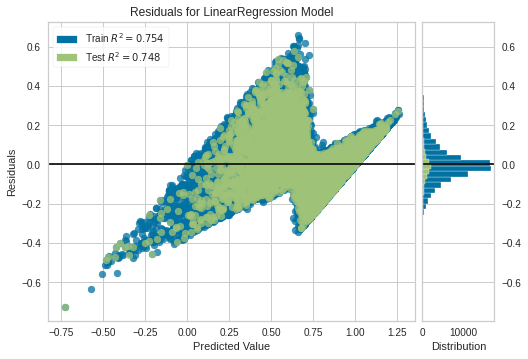

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
# Visualizing the residual plot for Linear Regression Model
residual_plot_visualizer = ResidualsPlot(optimized_linear_regression_model)
residual_plot_visualizer.fit(X_train_original, y_train_original)  # Fit the training data to the visualizer
residual_plot_visualizer.score(X_val, y_val)  # Evaluate the model on the validation data
residual_plot_visualizer.show()               # Finalize and render the figure

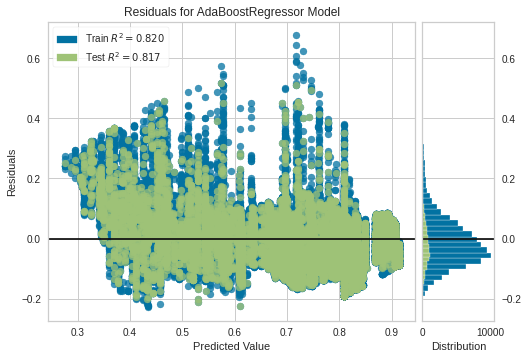

<AxesSubplot:title={'center':'Residuals for AdaBoostRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
# Visualizing the residual plot for Adaboost Regression Model
residual_plot_visualizer = ResidualsPlot(optimized_adaboost_regression_model)
residual_plot_visualizer.fit(X_train_original, y_train_original)  # Fit the training data to the visualizer
residual_plot_visualizer.score(X_val, y_val)  # Evaluate the model on the validation data
residual_plot_visualizer.show()               # Finalize and render the figure

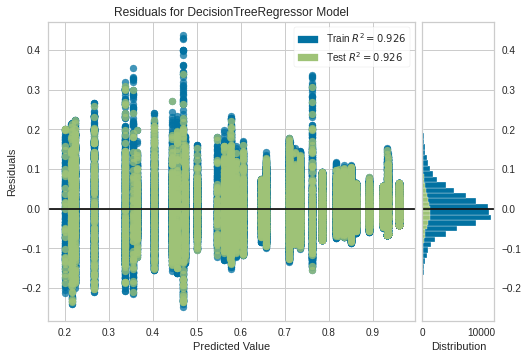

<AxesSubplot:title={'center':'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
# Visualizing the residual plot for Decision Tree Regression Model
residual_plot_visualizer = ResidualsPlot(optimized_decision_tree_regression_model)
residual_plot_visualizer.fit(X_train_original, y_train_original)  # Fit the training data to the visualizer
residual_plot_visualizer.score(X_val, y_val)  # Evaluate the model on the validation data
residual_plot_visualizer.show()               # Finalize and render the figure

#### Based on Mean Squared Error 

In [ ]:

fig = go.Figure()

y_pred_linear_regression = optimized_linear_regression_model.predict(X_train_original)
y_pred_adaboost_regression = optimized_adaboost_regression_model.predict(X_train_original)
y_pred_decision_tree_regression = optimized_decision_tree_regression_model.predict(X_train_original)

# Calculate the MSE for each model
mse_linear_regression = ((y_train_original - y_pred_linear_regression) ** 2).mean()
mse_adaboost_regression = ((y_train_original - y_pred_adaboost_regression) ** 2).mean()
mse_decision_tree_regression = ((y_train_original - y_pred_decision_tree_regression) ** 2).mean()


fig.add_trace(go.Bar(
        name = "MSE",
        x=["Linear Regressor", "Adaboost Regressor", "Decision Tree Regressor"],
        y=[mse_linear_regression,mse_adaboost_regression,mse_decision_tree_regression],
        text=[round(mse_linear_regression,4),round(mse_adaboost_regression,4),round(mse_decision_tree_regression,4)],
        marker_color=['red','orange','green']
    ))

fig.update_layout(
    title="Mean Squared Error (MSE) for all three Regression Models (On Training Dataset) ",
    xaxis_title="Regression Models",
    yaxis_title="Mean Squared Error",
    font_size=20
)

fig.show()

In [ ]:

fig = go.Figure()

y_pred_linear_regression = optimized_linear_regression_model.predict(X_val)
y_pred_adaboost_regression = optimized_adaboost_regression_model.predict(X_val)
y_pred_decision_tree_regression = optimized_decision_tree_regression_model.predict(X_val)

# Calculate the MSE for each model
mse_linear_regression = ((y_val - y_pred_linear_regression) ** 2).mean()
mse_adaboost_regression = ((y_val - y_pred_adaboost_regression) ** 2).mean()
mse_decision_tree_regression = ((y_val - y_pred_decision_tree_regression) ** 2).mean()


fig.add_trace(go.Bar(
        name = "MSE",
        x=["Linear Regressor", "Adaboost Regressor", "Decision Tree Regressor"],
        y=[mse_linear_regression,mse_adaboost_regression,mse_decision_tree_regression],
        text=[round(mse_linear_regression,4),round(mse_adaboost_regression,4),round(mse_decision_tree_regression,4)],
        marker_color=['red','orange','green']
    ))

fig.update_layout(
    title="Mean Squared Error (MSE) for all three Regression Models (On Validation Dataset) ",
    xaxis_title="Regression Models",
    yaxis_title="Mean Squared Error",
    font_size=20
)

fig.show()

#### Based on Feature Importance

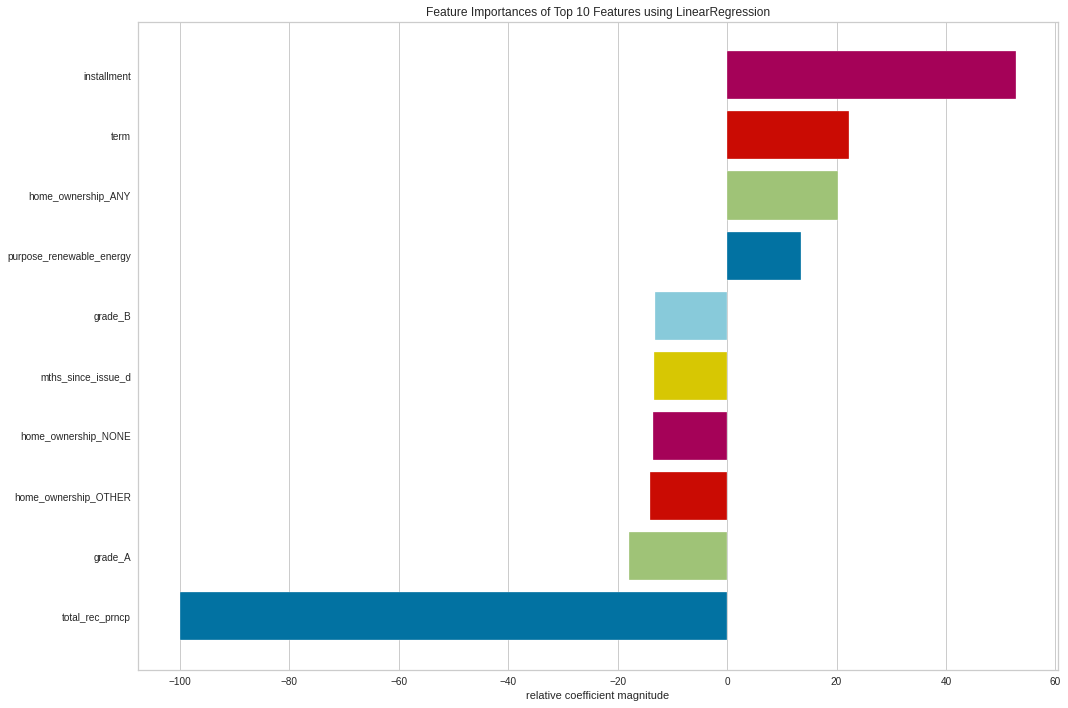

<AxesSubplot:title={'center':'Feature Importances of Top 10 Features using LinearRegression'}, xlabel='relative coefficient magnitude'>

In [ ]:
# Feature Importance using Linear Regression
plt.figure(figsize=(15, 10))
viz = FeatureImportances(optimized_linear_regression_model,topn=10)
viz.fit(X_train_original, y_train_original)
viz.show()

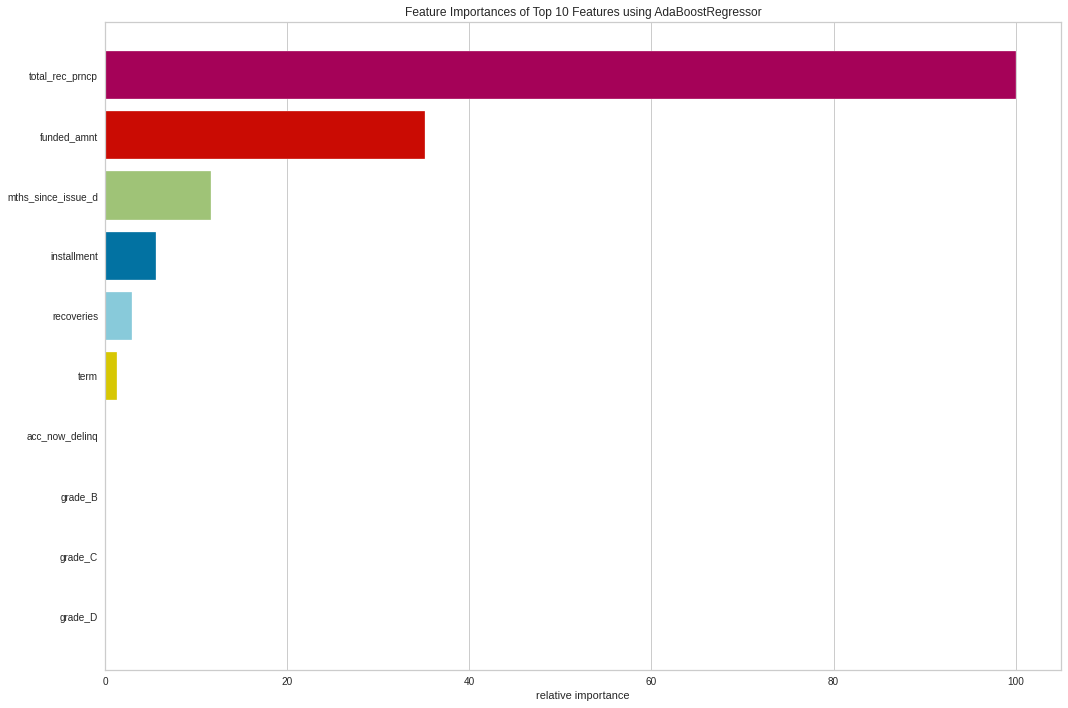

<AxesSubplot:title={'center':'Feature Importances of Top 10 Features using AdaBoostRegressor'}, xlabel='relative importance'>

In [ ]:
# Feature importance of Adaboost Regression
plt.figure(figsize=(15, 10))
viz = FeatureImportances(optimized_adaboost_regression_model,topn=10)
viz.fit(X_train_original, y_train_original)
viz.show()

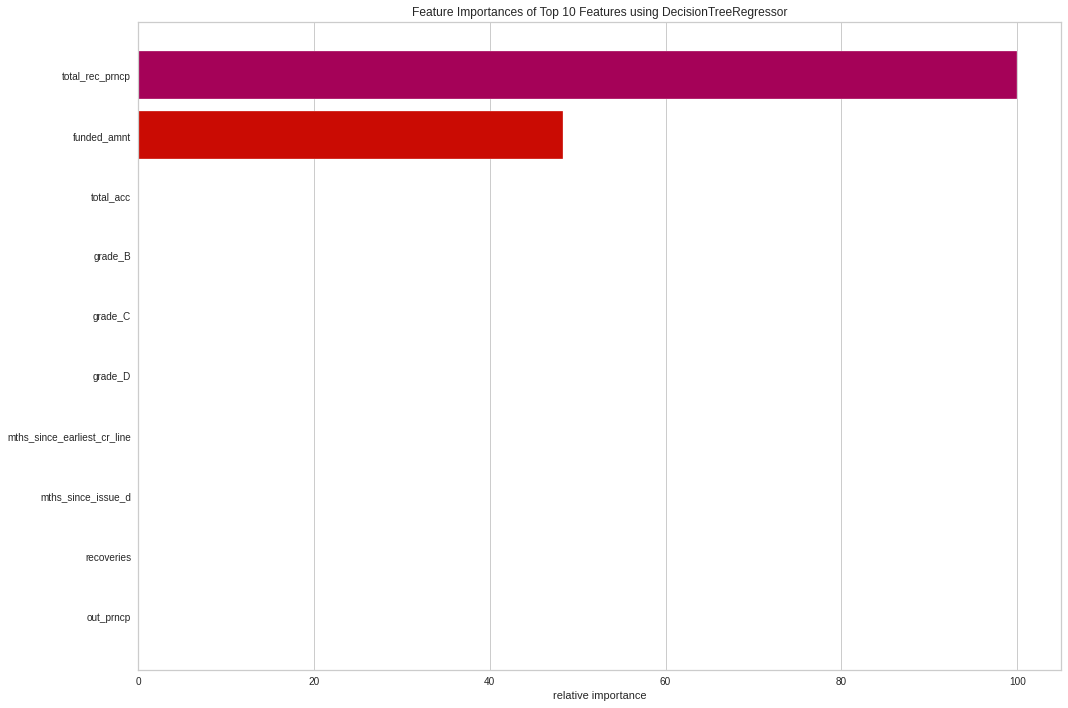

<AxesSubplot:title={'center':'Feature Importances of Top 10 Features using DecisionTreeRegressor'}, xlabel='relative importance'>

In [ ]:
# Feature Importance for Decision Tree Regression
plt.figure(figsize=(15, 10))
viz = FeatureImportances(optimized_decision_tree_regression_model,topn=10)
viz.fit(X_train_original, y_train_original)
viz.show()

### Final Prediction of CCF on Test Dataset

**OBJECTIVE:**


>The objective of this section is to perform the prediction and evaluate the prediction results on remaining test dataset using final selected top performing regression model

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

#### Prepare Test Dataset for prediction and Evaluation

In [ ]:
# apply data conversions to testing dataset
emp_length_converter(X_test, 'emp_length')
loan_term_converter(X_test, 'term')
int_rate_converter(X_test, 'int_rate')
date_column_converter(X_test, 'issue_d')
date_column_converter(X_test, 'earliest_cr_line')

# Test Dataset
object_to_numeric_converter(X_test,['dti',
                                    'delinq_2yrs',
                                    'mths_since_last_delinq',
                                    'mths_since_last_record',
                                    'open_acc',
                                    'pub_rec',
                                    'total_acc',
                                    'acc_now_delinq',
                                    'total_rev_hi_lim',
                                    'mths_since_earliest_cr_line'])

# on test dataset
X_test[null_numerical_columns] = random_sample_imputer.transform(X_test[null_numerical_columns])

#test dataset
X_test = ohe_enc.transform(X_test)

# test dataset
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

#### Prediction and Evaluation of regression model for Credit Conversion Factor (CCF)

In [ ]:
# Perform the CCF predictions on test dataset using optimized adaboost regression model
y_ccf_predictions = optimized_adaboost_regression_model.predict(X_test)

In [ ]:
# Print the regression evaluation metrics or KPI after prediction on test dataset
print("R2 on unseen data is : {:.2f}".format(r2_score(y_test,y_ccf_predictions)))
print("Mean Squared Error on unseen data is : {:.2f}".format(mean_squared_error(y_test,y_ccf_predictions)))

R2 on unseen data is : 0.82
Mean Squared Error on unseen data is : 0.01


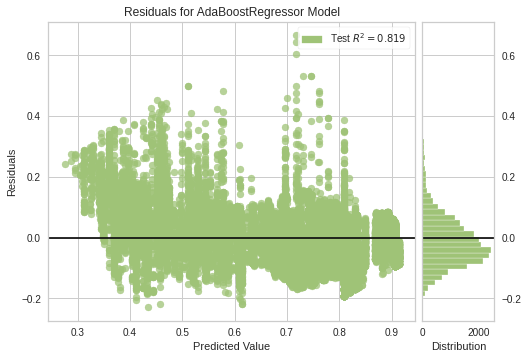

<AxesSubplot:title={'center':'Residuals for AdaBoostRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
# Visualizing the residual plot for Adaboost Regression Model
residual_plot_visualizer = ResidualsPlot(optimized_adaboost_regression_model)
residual_plot_visualizer.score(X_test, y_test)  # Evaluate the model on the Test data
residual_plot_visualizer.show()               # Finalize and render the figure

### Prediction Interpretation on Charged-Off Loan and calculation of Expected Loss using predicted CCF

**OBJECTIVE:**


>The objective of this section is to perform the prediction on a new charged-off loan for CCF along with calculation of Expected loss and interpret the result 

In [ ]:
!gdown 1Q0oiVpa8IGvih3lV2kpsZ4jrWhY5GKE0

Downloading...
From: https://drive.google.com/uc?id=1Q0oiVpa8IGvih3lV2kpsZ4jrWhY5GKE0
To: /content/charged_off_loan.csv
100% 494/494 [00:00<00:00, 758kB/s]


In [ ]:
charged_off_loan_data = pd.read_csv("charged_off_loan.csv")

In [ ]:
charged_off_loan_data.head()

,grade,total_rec_prncp,home_ownership,verification_status,purpose,initial_list_status,term,emp_length,issue_d,earliest_cr_line,...,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,acc_now_delinq,total_rev_hi_lim,revol_bal,out_prncp,recoveries
0,B,625.53,RENT,Not Verified,credit_card,f,36 months,< 1 year,Sep-2017,Apr-1987,...,18.0,NaN,7.0,0.0,27.0,0.0,27600.0,13188.0,0.0,10061.0


In [ ]:
funded_amount = charged_off_loan_data['funded_amnt']
print("Amount funded to the borrower when the loan was approved: {:.2f}".format(float(funded_amount)))

Amount funded to the borrower when the loan was approved: 13000.00


In [ ]:
# apply data conversions to new data sample
emp_length_converter(charged_off_loan_data, 'emp_length')
loan_term_converter(charged_off_loan_data, 'term')
int_rate_converter(charged_off_loan_data, 'int_rate')
date_column_converter(charged_off_loan_data, 'issue_d')
date_column_converter(charged_off_loan_data, 'earliest_cr_line')

# new data sample
object_to_numeric_converter(charged_off_loan_data,['dti',
                                    'delinq_2yrs',
                                    'mths_since_last_delinq',
                                    'mths_since_last_record',
                                    'open_acc',
                                    'pub_rec',
                                    'total_acc',
                                    'acc_now_delinq',
                                    'total_rev_hi_lim',
                                    'mths_since_earliest_cr_line'])

# impute missing values on new data sample
charged_off_loan_data[null_numerical_columns] = random_sample_imputer.transform(charged_off_loan_data[null_numerical_columns])

# encoding using one-hot encoding new data sample
charged_off_loan_data = ohe_enc.transform(charged_off_loan_data)

# perform scaling on new data sample
charged_off_loan_data[numerical_columns] = scaler.transform(charged_off_loan_data[numerical_columns])

In [ ]:
predicted_ccf = optimized_adaboost_regression_model.predict(charged_off_loan_data)[0]
print("Credit Conversion Factor (CCF) predicted is: {:.3f}".format(predicted_ccf))

Credit Conversion Factor (CCF) predicted is: 0.907


In [ ]:
expected_loss = funded_amount*predicted_ccf
print("Expected Loss to the Financial Institution after the Borrower Charged-Off is {:.3f} USD".format(float(expected_loss)))

Expected Loss to the Financial Institution after the Borrower Charged-Off is 11792.261 USD
